<a href="https://colab.research.google.com/github/fatihbahri/deep_learning/blob/main/Img_Class_w_VGG16.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import Libraries

In [1]:
import numpy as np
from PIL import Image
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input, decode_predictions

## Weights of trained model

In [2]:
model = VGG16(weights='imagenet', include_top=True)

553467904/553467096 [==============================] - 3s 0us/step


### Layers

In [6]:
layers = dict([(layer.name, layer.output) for layer in model.layers])
# print(layers)
model.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

### Parameters counting

In [7]:
model.count_params()

138357544

## Go to image path

In [15]:
from google.colab import drive
drive.mount('/gdrive')
%cd /gdrive

Mounted at /gdrive
/gdrive


In [33]:
import os
os.chdir('/gdrive/My Drive/Colab Notebooks')

In [40]:
!ls

 araba.jpg     Evrisim.ipynb	     MNIST_Ornek.ipynb	 'VGG16 in Keras.ipynb'
 ddef.jpg      f35.jpg		     Pomeranian_01.jpeg   VGG16_Ornek.ipynb
 dog1.jpg      Fashion_MNIST.ipynb   tree.jpg
 erdogan.jpg   kepce.jpg	     Untitled0.ipynb


## Get the image and preprocess

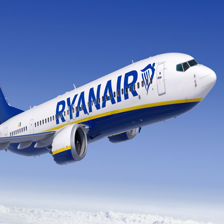

In [42]:
img_path = 'ddef.jpg'
image = Image.open(img_path)
image = image.resize((224,224))
image

In [43]:
x = np.array(image, dtype='float32')
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)

# Prediction | Classication

In [49]:
pred = model.predict(x)
print(decode_predictions(pred, top=5)[0])
rate = int(decode_predictions(pred, top=1)[0][0][2]*100)
print('\n Object in the image is probably ', decode_predictions(pred, top=1)[0][0][1], '(probability rate=', rate, '%)')

[('n02690373', 'airliner', 0.89494264), ('n04592741', 'wing', 0.08819905), ('n02692877', 'airship', 0.014380781), ('n04552348', 'warplane', 0.0021106156), ('n04273569', 'speedboat', 6.899322e-05)]

 Object in the image is probably  airliner (probability rate= 89 %)
